# Simulation

### Setup

In the cell below we will load the core libraries we will be using.

In [2]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Misc libraries
import os
import time
from datetime import date

# Statistical libraries
import scipy.stats as stats   # Imports the entire scipy.stats (all distributions)
from scipy.stats import norm
from reliability.Distributions import Weibull_Distribution

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

## Question 1: 

Suppose that you are given the data points in the `PS3_Data.xlsx` and you know that it comes from a Weibull distribution with unknown $\alpha$ and $\beta = 3$

In [13]:
# Importing data from Excel

prj_data = pd.read_excel("Data_File.xlsx", index_col = 0, header = None).T
column_names = ["interarrival_times", "service_times_initial_phase", "service_times_placing_keyboard", "service_times_assembling"]
prj_data.columns = column_names
prj_data.head()

,interarrival_times,service_times_initial_phase,service_times_placing_keyboard,service_times_assembling
1,3.99409,4.00824,3.50048,2.84647
2,2.79135,3.56952,7.25628,0.808998
3,4.59439,3.70369,8.2075,19.3035
4,5.85795,4.79379,0.216804,4.62961
5,4.45196,4.55387,1.15234,0.231057


In [ ]:
print("Number of data points:", prj_data.shape[0])

1. Estimate the distributions of each process. Justify the fact that your estimation is reasonable (you only need one goodness-of-fit test you prefer)

a. Plot the histogram and compare it with the density function of Weibull

<AxesSubplot:ylabel='Count'>

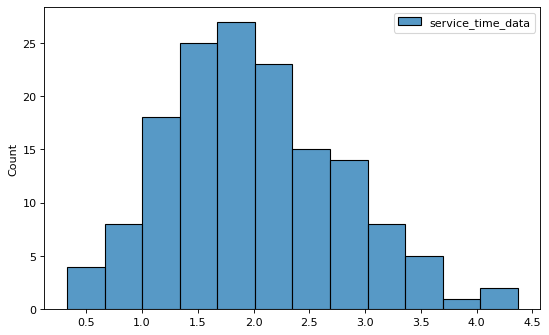

In [43]:
# Plot histogram of the data
sns.histplot(ps3_data)

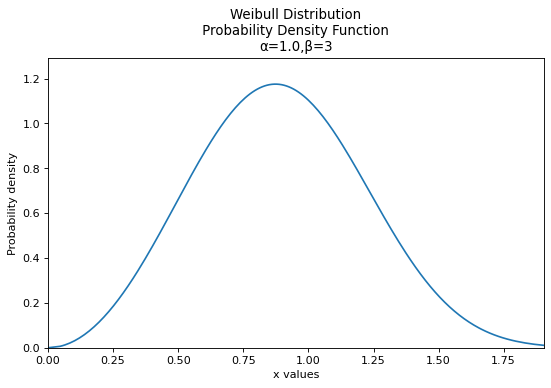

In [44]:
# Compare against Weibull distribution
dist = Weibull_Distribution(alpha=1, beta=3)  # this created the distribution object
dist.PDF()  # this creates the plot of the PDF
plt.show()

It can be seen in the plots that the data supplied resembles a Weibull distribution. I used a Weibull distribution with $\alpha = 1$ and $\beta = 3$, these parameters were picked as guess only.

b. Estimate $\alpha$:

The inverse function of a Weibull distribution is:

$$F^{-1}(U) = \alpha\sqrt[\beta]{-ln(1-U)}$$

Using Workshop 2(Question 2) information, we were able to generate variates with Weibull distribution using the following equation, where X is the random variate:


$$X = \alpha\sqrt[\beta]{-ln(1-U)}$$

To estimate $\alpha$, we use the following LCG to generate uniform random variates using $U(0,1)$ and an LCG generator with parameters
$$Z_{n+1} = 4781Z_n + 8521 \ \ mod \ \ 16384$$ 
and $Z_0 = 1136$


<AxesSubplot:xlabel='ln_data', ylabel='Count'>

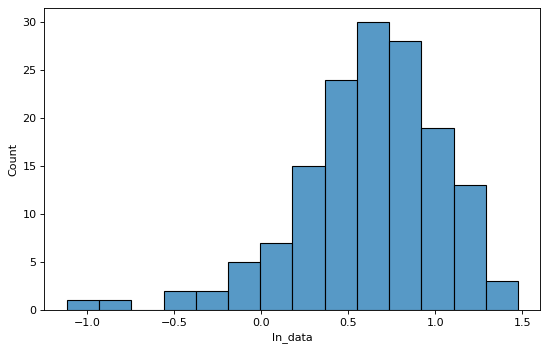

In [47]:
# take the natural log of the data points
ps3_data["ln_data"] = np.log(ps3_data.service_time_data)

sns.histplot(data = ps3_data["ln_data"])

### Plot ELCC proportion against the unit capacities

## Task 2: Small Y approximation